In [1]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

In [2]:
# Reading the saved data pickle file
df_stocks = pd.read_pickle('DataGathered/ProcesssedData/pickled_ten_year_filtered_lead_para.pkl')

In [3]:
df_stocks

,close,adj close,articles
2007-01-01,12469.971875,12469.971875,. Estimates of Iraqi Civilian Deaths. Romania ...
2007-01-02,12472.245703,12472.245703,". For Dodd, Wall Street Looms Large. Ford's Lo..."
2007-01-03,12474.519531,12474.519531,". Ethics Changes Proposed for House Trips, K S..."
2007-01-04,12480.690430,12480.690430,. I Feel Bad About My Face. Bush Recycles the ...
2007-01-05,12398.009766,12398.009766,. Macworld Bingo. Anti-Surge Protests Against ...
2007-01-06,12406.503255,12406.503255,. In da Car at Dakar. The Macworld-C.E.S. Conf...
2007-01-07,12414.996745,12414.996745,. BitTorrent Comes to the Television. LG&#8217...
2007-01-08,12423.490234,12423.490234,. That R2 Unit Is a Real Bargain. HDTV Heavy. ...
2007-01-09,12416.599609,12416.599609,. The iPhone Rumors Are Right&#8230;Finally. P...
2007-01-10,12442.160156,12442.160156,. A Ride in a Gaming Chair. More iPhone Fun Fa...


In [8]:
df_stocks['prices'] = df_stocks['adj close'].apply(np.int64)

KeyError: 'adj close'

In [9]:
# selecting the prices and articles
df_stocks = df_stocks[['prices', 'articles']]

In [10]:
df_stocks['articles'] = df_stocks['articles'].map(lambda x: x.lstrip('.-'))

In [11]:
df_stocks

,prices,articles
2007-01-01,12469,Estimates of Iraqi Civilian Deaths. Romania a...
2007-01-02,12472,"For Dodd, Wall Street Looms Large. Ford's Los..."
2007-01-03,12474,"Ethics Changes Proposed for House Trips, K St..."
2007-01-04,12480,I Feel Bad About My Face. Bush Recycles the T...
2007-01-05,12398,Macworld Bingo. Anti-Surge Protests Against M...
2007-01-06,12406,In da Car at Dakar. The Macworld-C.E.S. Confl...
2007-01-07,12414,BitTorrent Comes to the Television. LG&#8217;...
2007-01-08,12423,That R2 Unit Is a Real Bargain. HDTV Heavy. L...
2007-01-09,12416,The iPhone Rumors Are Right&#8230;Finally. Pr...
2007-01-10,12442,A Ride in a Gaming Chair. More iPhone Fun Fac...


In [12]:
df = df_stocks[['prices']].copy()
df

,prices
2007-01-01,12469
2007-01-02,12472
2007-01-03,12474
2007-01-04,12480
2007-01-05,12398
2007-01-06,12406
2007-01-07,12414
2007-01-08,12423
2007-01-09,12416
2007-01-10,12442


In [13]:
# Adding new columns to the data frame
df["compound"] = ''
df["neg"] = ''
df["neu"] = ''
df["pos"] = ''

In [14]:
df

,prices,compound,neg,neu,pos
2007-01-01,12469,,,,
2007-01-02,12472,,,,
2007-01-03,12474,,,,
2007-01-04,12480,,,,
2007-01-05,12398,,,,
2007-01-06,12406,,,,
2007-01-07,12414,,,,
2007-01-08,12423,,,,
2007-01-09,12416,,,,
2007-01-10,12442,,,,


In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sid = SentimentIntensityAnalyzer()
for date, row in df_stocks.T.iteritems():
    try:
        sentence = unicodedata.normalize('NFKD', df_stocks.loc[date, 'articles'])
        ss = sid.polarity_scores(sentence)
        df.set_value(date, 'compound', ss['compound'])
        df.set_value(date, 'neg', ss['neg'])
        df.set_value(date, 'neu', ss['neu'])
        df.set_value(date, 'pos', ss['pos'])
    except TypeError:
        print (df_stocks.loc[date, 'articles'])
        print (date)

In [16]:
# sentence = 'paris shootout police officer suspected guman dead'
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import unicodedata
# sid = SentimentIntensityAnalyzer()
# ss = sid.polarity_scores(sentence)
# ss

In [17]:
# Checking date for empty strings
# for date, row in df_stocks.T.iteritems():
#     if type(df_stocks.loc[date, 'articles']).__name__ == 'str':
#         print date

In [18]:
df

,prices,compound,neg,neu,pos
2007-01-01,12469,-0.9881,0.176,0.723,0.102
2007-01-02,12472,-0.397,0.117,0.778,0.105
2007-01-03,12474,-0.9994,0.196,0.749,0.055
2007-01-04,12480,-0.9975,0.112,0.835,0.053
2007-01-05,12398,-0.9882,0.118,0.8,0.082
2007-01-06,12406,-0.9668,0.124,0.785,0.091
2007-01-07,12414,-0.9957,0.162,0.772,0.066
2007-01-08,12423,-0.8171,0.083,0.839,0.078
2007-01-09,12416,-0.9932,0.091,0.864,0.046
2007-01-10,12442,0.7728,0.095,0.804,0.101


In [19]:
train_start_date = '2007-01-01'
train_end_date = '2015-12-31'
test_start_date = '2016-01-01'
test_end_date = '2017-12-31'
train = df.ix[train_start_date : train_end_date]
test = df.ix[test_start_date:test_end_date]

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [20]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [21]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [22]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])

In [23]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [24]:
print (rf.feature_importances_)

[ 0.52111612  0.47888388]


In [25]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

In [26]:
prediction

array([ 15486.5       ,   9269.57142857,  13436.6       ,  15280.1       ,
        14496.16666667,  15663.56      ,  14040.05      ,  12825.7       ,
        13584.5       ,  13722.2       ,  13176.2       ,  12868.05833333,
        12294.8       ,  14108.79666667,  14720.7       ,  12549.3       ,
        14997.2       ,  13791.38888889,  13229.73333333,  13719.3       ,
        13178.7       ,  12862.34      ,  13286.5       ,  16027.2       ,
        12673.9       ,  11728.70833333,  14056.08      ,  15189.4       ,
        15792.        ,  12658.9       ,  13369.1       ,  15704.        ,
        13878.8       ,  10345.605     ,  11423.6       ,  17924.5       ,
        11830.85      ,  12351.5       ,  15150.03333333,  15889.6       ,
        13996.1       ,  11805.        ,  13843.2       ,  17503.3       ,
        15795.6       ,  13227.9       ,  11586.6       ,  14370.5       ,
         8897.50833333,  12510.10833333,  11457.05      ,  11667.4       ,
        12753.6       ,  

In [27]:
contributions

array([[ 1189.37094165,  1133.40697134],
       [-1539.46782987, -2354.68282856],
       [ 1840.48883632, -1567.61092333],
       ..., 
       [ -103.82165379,   167.99956678],
       [ -103.82165379,   167.99956678],
       [ -103.82165379,   167.99956678]])

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
idx = pd.date_range(test_start_date, test_end_date)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])

In [30]:
predictions_df

,prices
2016-01-01,15486.500000
2016-01-02,9269.571429
2016-01-03,13436.600000
2016-01-04,15280.100000
2016-01-05,14496.166667
2016-01-06,15663.560000
2016-01-07,14040.050000
2016-01-08,12825.700000
2016-01-09,13584.500000
2016-01-10,13722.200000


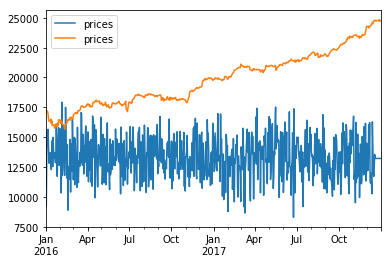

In [31]:
#predictions_df.plot() 
#test['prices'].plot()

predictions_plot = predictions_df.plot()

fig = y_test.plot(ax = predictions_plot).get_figure()

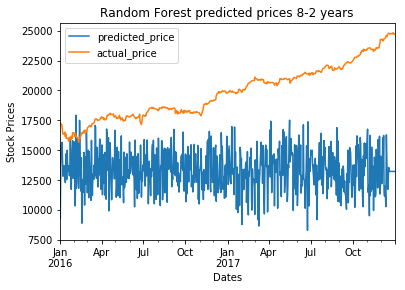

In [32]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
# colors = ['332288', '88CCEE', '44AA99', '117733', '999933', 'DDCC77', 'CC6677', '882255', 'AA4499']

In [33]:
test

,prices,compound,neg,neu,pos
2016-01-01,17356,-0.9966,0.185,0.749,0.066
2016-01-02,17286,-0.941,0.14,0.753,0.106
2016-01-03,17217,-0.9521,0.16,0.72,0.12
2016-01-04,17148,0.966,0.063,0.84,0.098
2016-01-05,17158,-0.9972,0.15,0.775,0.075
2016-01-06,16906,-0.9975,0.14,0.791,0.069
2016-01-07,16514,-0.995,0.13,0.789,0.081
2016-01-08,16346,-0.9965,0.123,0.825,0.052
2016-01-09,16363,-0.995,0.144,0.8,0.057
2016-01-10,16381,-0.8444,0.136,0.742,0.123


# Increasing the prices by a constant value so that it represents closing price during the testing

In [34]:
from datetime import datetime, timedelta

temp_date = test_start_date
average_last_5_days_test = 0
total_days = 10
for i in range(total_days):
    average_last_5_days_test += test.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Reducing one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    #print temp_date
average_last_5_days_test = average_last_5_days_test / total_days
print (average_last_5_days_test)

temp_date = test_start_date
average_upcoming_5_days_predicted = 0
for i in range(total_days):
    average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Adding one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    print (temp_date)
average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
print (average_upcoming_5_days_predicted)
#average train.loc['2013-12-31', 'prices'] - advpredictions_df.loc['2014-01-01', 'prices']
difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
print (difference_test_predicted_prices)

16867.5
2016-01-02
2016-01-03
2016-01-04
2016-01-05
2016-01-06
2016-01-07
2016-01-08
2016-01-09
2016-01-10
2016-01-11
13780.4948095
3087.00519048


In [35]:
predictions_df

,prices
2016-01-01,15486.500000
2016-01-02,9269.571429
2016-01-03,13436.600000
2016-01-04,15280.100000
2016-01-05,14496.166667
2016-01-06,15663.560000
2016-01-07,14040.050000
2016-01-08,12825.700000
2016-01-09,13584.500000
2016-01-10,13722.200000


In [36]:
# Adding 6177 to all the advpredictions_df price values
predictions_df['prices'] = predictions_df['prices'] + difference_test_predicted_prices
predictions_df

,prices
2016-01-01,18573.505190
2016-01-02,12356.576619
2016-01-03,16523.605190
2016-01-04,18367.105190
2016-01-05,17583.171857
2016-01-06,18750.565190
2016-01-07,17127.055190
2016-01-08,15912.705190
2016-01-09,16671.505190
2016-01-10,16809.205190


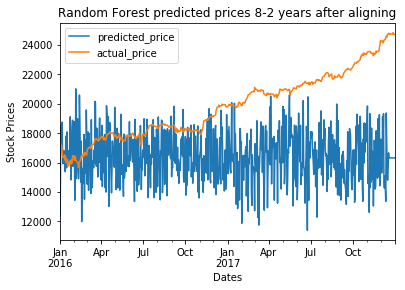

In [37]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years after aligning')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()

# Smoothing the time series data

# Applying EWMA pandas to smooth the stock prices

In [38]:
predictions_df

,prices
2016-01-01,18573.505190
2016-01-02,12356.576619
2016-01-03,16523.605190
2016-01-04,18367.105190
2016-01-05,17583.171857
2016-01-06,18750.565190
2016-01-07,17127.055190
2016-01-08,15912.705190
2016-01-09,16671.505190
2016-01-10,16809.205190


In [39]:
predictions_df['ewma'] = pd.ewma(predictions_df["prices"], span=60, freq="D")

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=60,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


In [40]:
predictions_df

,prices,ewma
2016-01-01,18573.505190,18573.505190
2016-01-02,12356.576619,15413.233167
2016-01-03,16523.605190,15795.762034
2016-01-04,18367.105190,16471.090694
2016-01-05,17583.171857,16708.577564
2016-01-06,18750.565190,17077.889044
2016-01-07,17127.055190,17085.634317
2016-01-08,15912.705190,16921.353067
2016-01-09,16671.505190,16889.749444
2016-01-10,16809.205190,16880.434168


In [41]:
predictions_df['actual_value'] = test['prices']
predictions_df['actual_value_ewma'] = pd.ewma(predictions_df["actual_value"], span=60, freq="D")

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=60,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
  


In [42]:
predictions_df

,prices,ewma,actual_value,actual_value_ewma
2016-01-01,18573.505190,18573.505190,17356,17356.000000
2016-01-02,12356.576619,15413.233167,17286,17320.416667
2016-01-03,16523.605190,15795.762034,17217,17284.789094
2016-01-04,18367.105190,16471.090694,17148,17248.863280
2016-01-05,17583.171857,16708.577564,17158,17229.459268
2016-01-06,18750.565190,17077.889044,16906,17170.958806
2016-01-07,17127.055190,17085.634317,16514,17067.466339
2016-01-08,15912.705190,16921.353067,16346,16966.417273
2016-01-09,16671.505190,16889.749444,16363,16890.090141
2016-01-10,16809.205190,16880.434168,16381,16831.211759


In [43]:
# Changing column names
predictions_df.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']

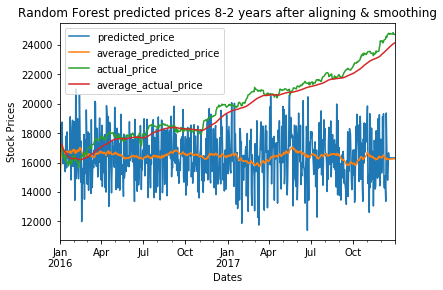

In [44]:
# Now plotting test predictions after smoothing
predictions_plot = predictions_df.plot(title='Random Forest predicted prices 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()

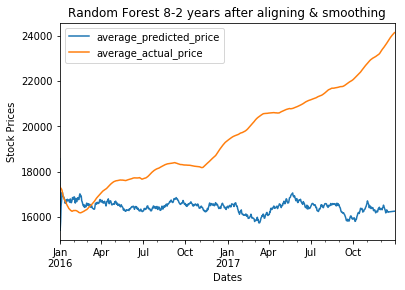

In [45]:
# Plotting just predict and actual average curves
predictions_df_average = predictions_df[['average_predicted_price', 'average_actual_price']]
predictions_plot = predictions_df_average.plot(title='Random Forest 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()

# Increasing the prices by a constant value so that it represents closing price during the testing

In [46]:
def offset_value(test_start_date, test, predictions_df):
    temp_date = test_start_date
    average_last_5_days_test = 0
    average_upcoming_5_days_predicted = 0
    total_days = 10
    for i in range(total_days):
        average_last_5_days_test += test.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_last_5_days_test = average_last_5_days_test / total_days

    temp_date = test_start_date
    for i in range(total_days):
        average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
    difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
    return difference_test_predicted_prices

# LogisticRegression

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


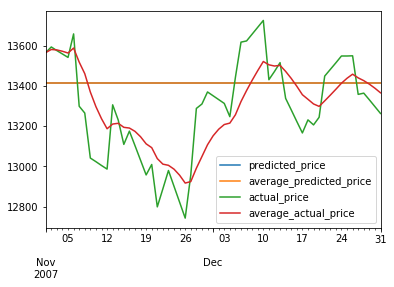

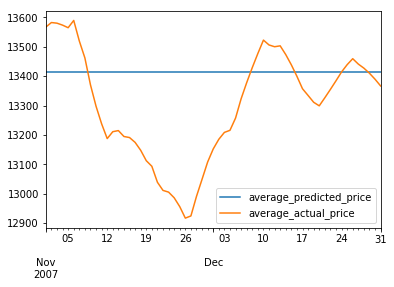

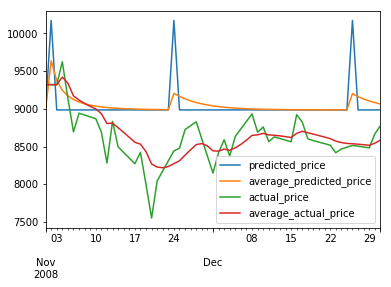

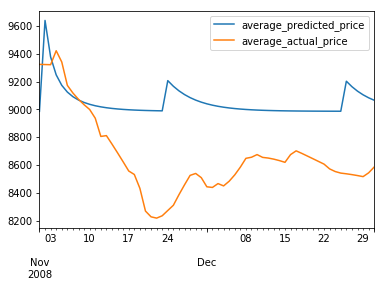

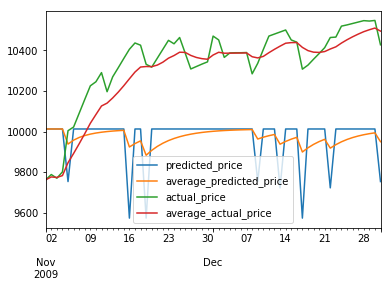

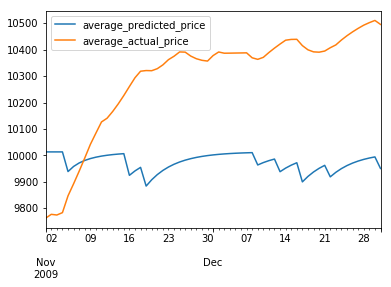

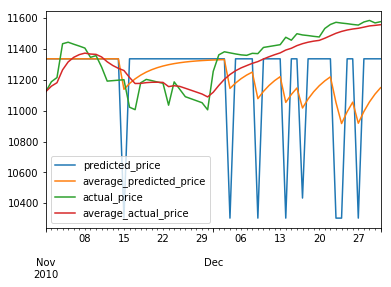

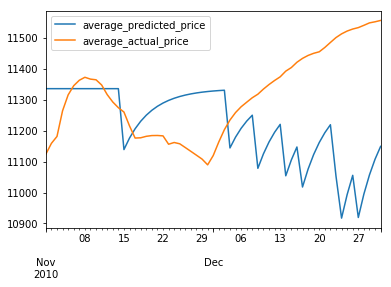

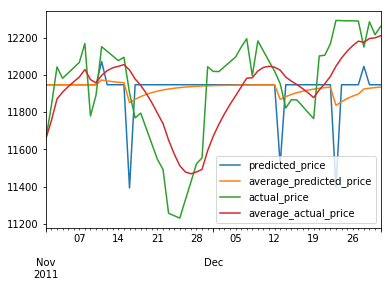

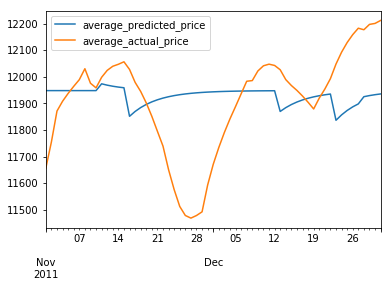

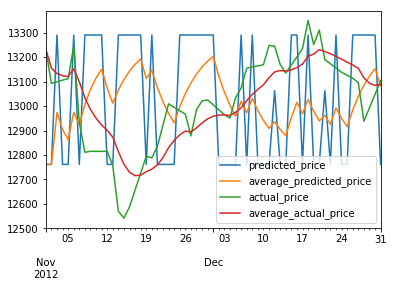

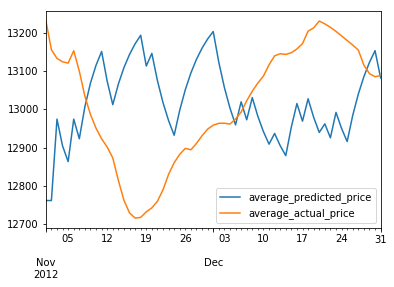

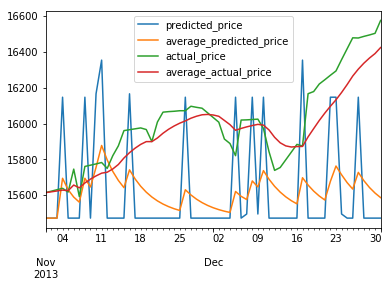

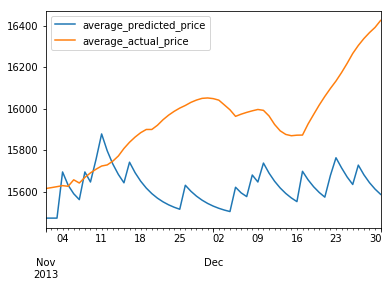

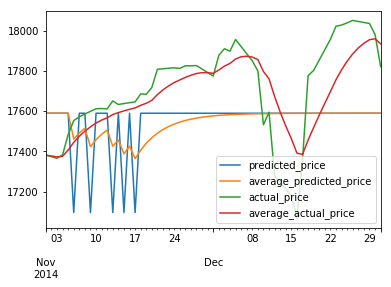

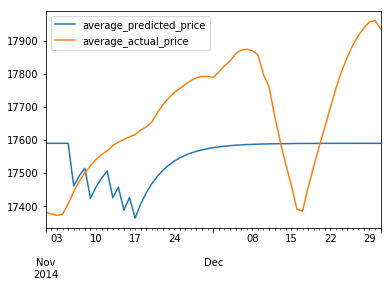

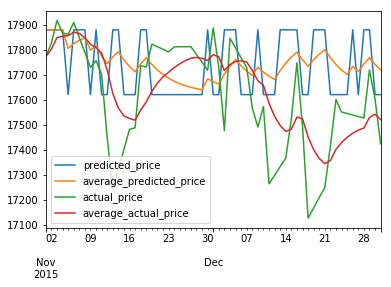

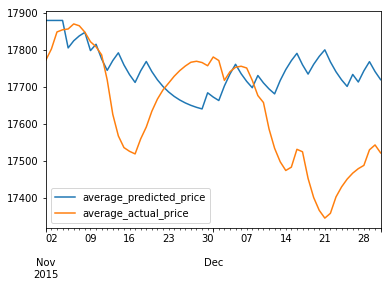

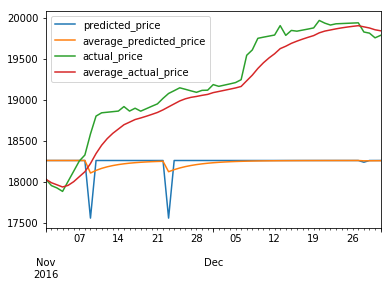

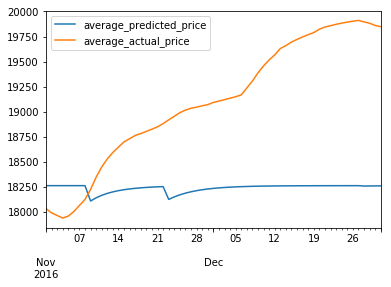

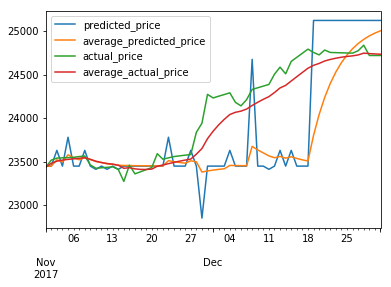

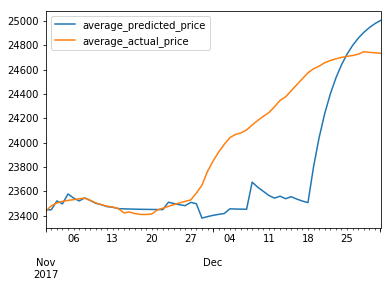

In [47]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.ix[train_start_date : train_end_date]
    test = df.ix[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    lr = LogisticRegression()
    lr.fit(numpy_df_train, train['prices'])
    

    prediction = lr.predict(numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = pd.ewma(predictions_df_list["prices"], span=10, freq="D")
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = pd.ewma(predictions_df_list["actual_value"], span=10, freq="D")
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
#     predictions_df_list.show()
    

In [48]:
lr.classes_

array([19732, 19799, 19804, 19808, 19818, 19822, 19826, 19827, 19841,
       19851, 19855, 19856, 19864, 19870, 19881, 19884, 19885, 19887,
       19890, 19891, 19899, 19912, 19938, 19942, 19954, 19963, 19971,
       20012, 20052, 20054, 20058, 20065, 20068, 20071, 20090, 20093,
       20100, 20172, 20269, 20316, 20364, 20404, 20412, 20453, 20499,
       20504, 20523, 20545, 20547, 20550, 20566, 20578, 20581, 20591,
       20596, 20606, 20611, 20619, 20624, 20636, 20648, 20650, 20651,
       20653, 20654, 20656, 20657, 20658, 20659, 20661, 20662, 20663,
       20668, 20683, 20689, 20691, 20701, 20713, 20728, 20743, 20763,
       20775, 20804, 20810, 20812, 20821, 20826, 20832, 20834, 20837,
       20855, 20858, 20864, 20881, 20888, 20894, 20895, 20896, 20902,
       20905, 20908, 20911, 20913, 20914, 20919, 20922, 20924, 20925,
       20931, 20934, 20937, 20940, 20943, 20949, 20950, 20951, 20953,
       20954, 20957, 20971, 20975, 20979, 20981, 20988, 20996, 21002,
       21005, 21006,

In [49]:
lr.coef_[0]

array([ 0.54042216, -0.34753522, -1.93323562, -0.28310661])

# RandomForestRegressor

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False)

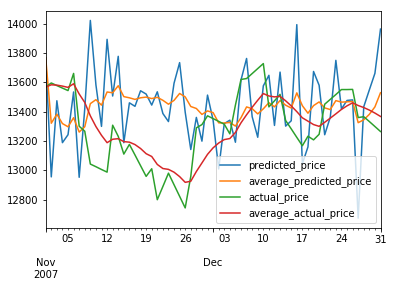

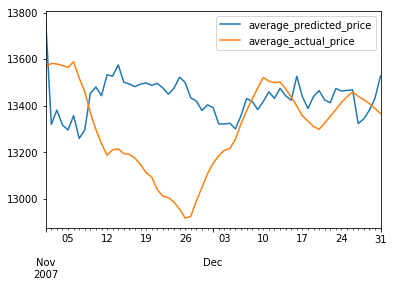

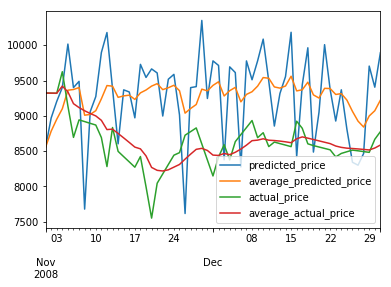

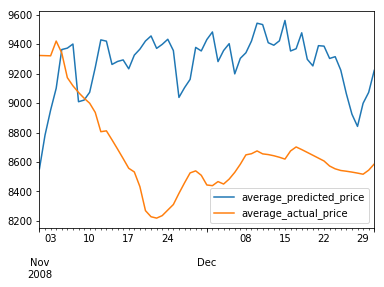

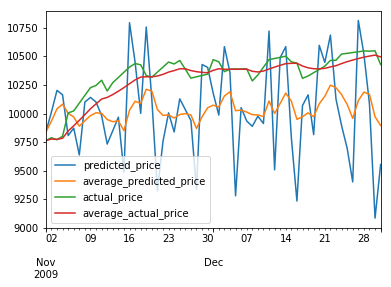

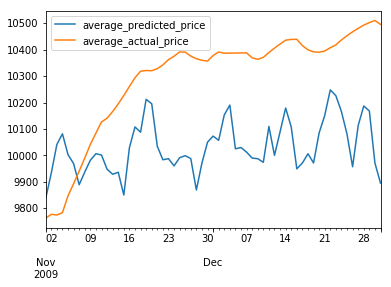

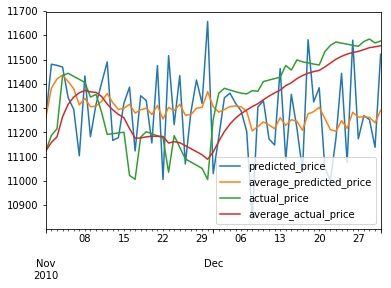

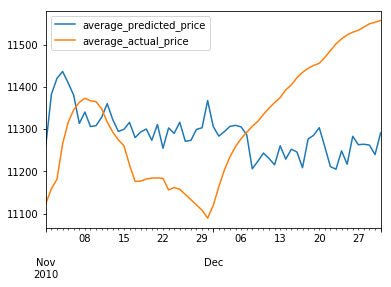

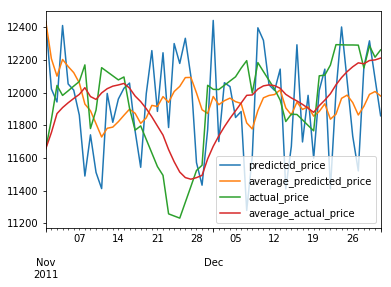

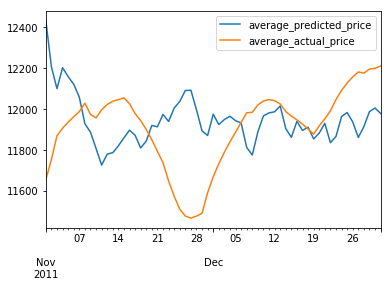

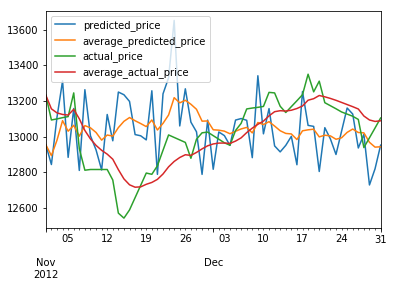

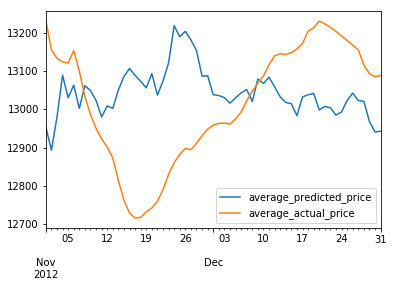

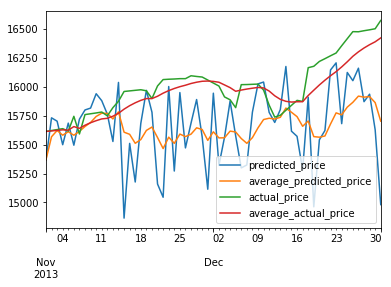

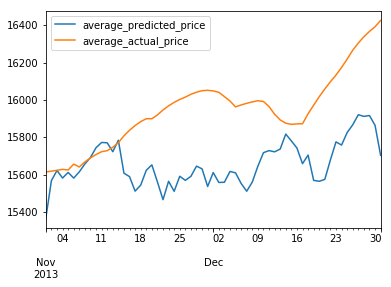

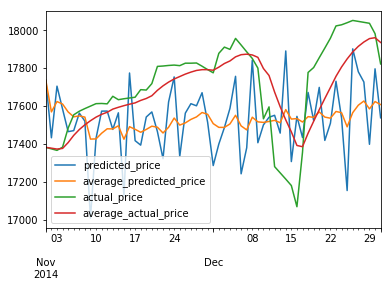

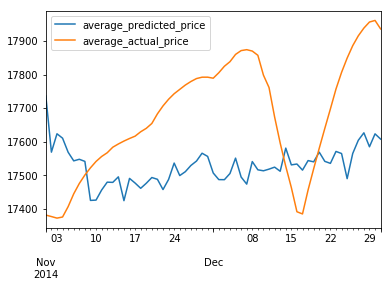

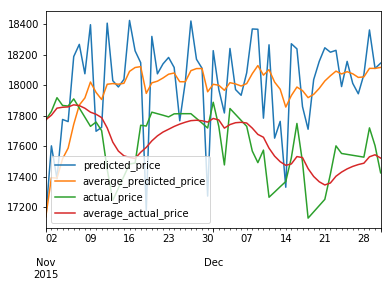

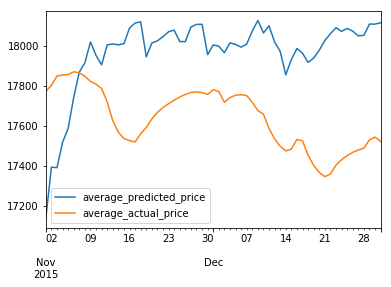

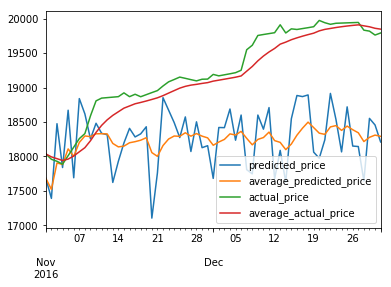

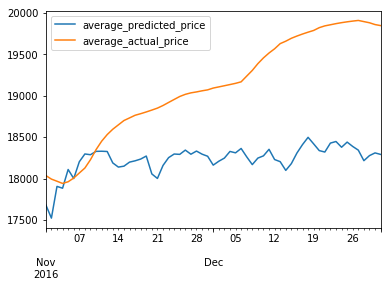

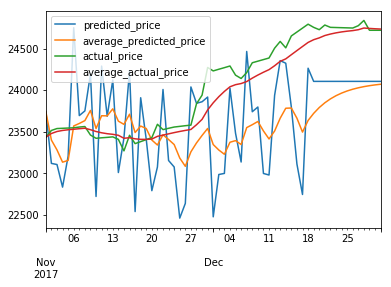

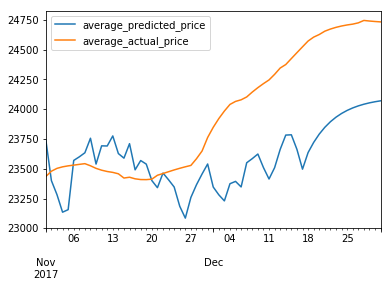

In [50]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.ix[train_start_date : train_end_date]
    test = df.ix[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    rf = RandomForestRegressor(random_state=665)
    rf.fit(numpy_df_train, train['prices'])
    #print rf
    
    prediction, bias, contributions = ti.predict(rf, numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = pd.ewma(predictions_df_list["prices"], span=10, freq="D")
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = pd.ewma(predictions_df_list["actual_value"], span=10, freq="D")
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
#     predictions_df_list.show()
    

In [51]:
# from IPython.display import Image  
# dot_data = tree.export_graphviz(rf, out_file=None, 
#                      feature_names=['comp', 'neg', 'neu', 'pos'],  
#                      class_names=iris.target_names,  
#                      filled=True, rounded=True,  
#                      special_characters=True)  
# graph = pydotplus.graph_from_dot_data(dot_data)  
# Image(graph.create_png())

# MLP Classifier

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=20,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=20,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()


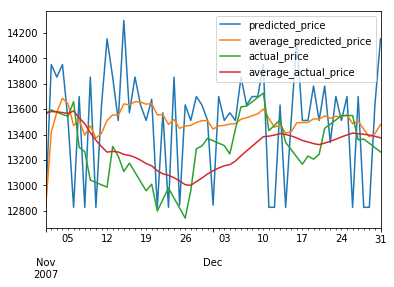

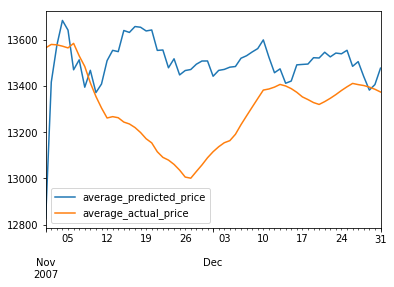

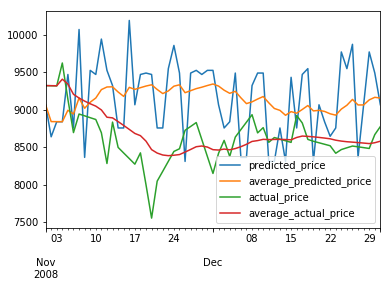

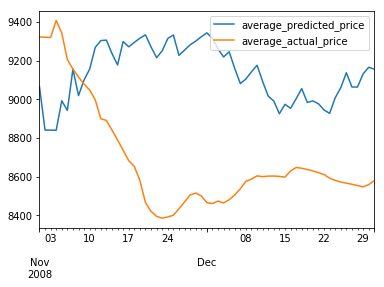

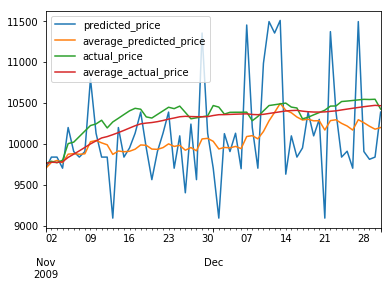

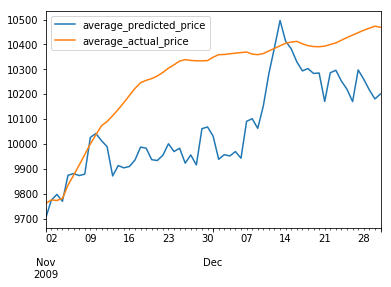

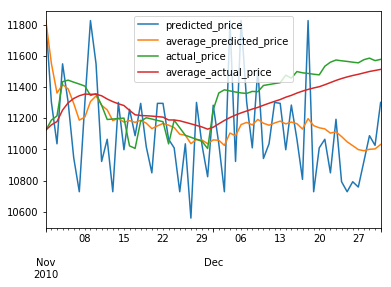

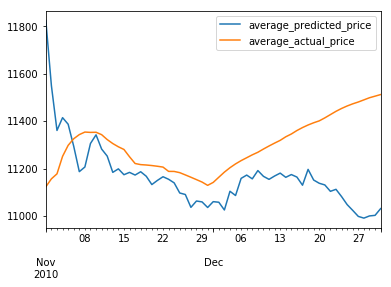

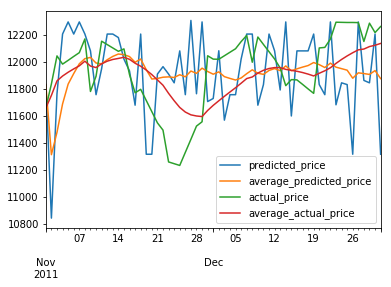

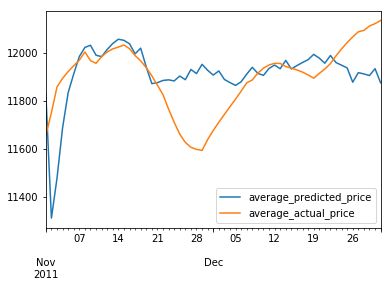

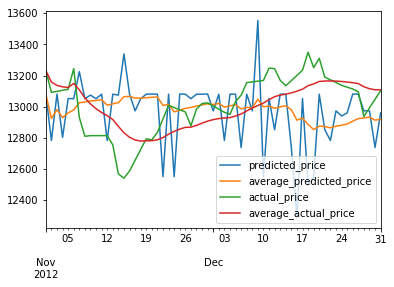

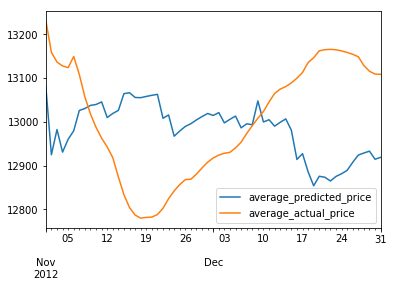

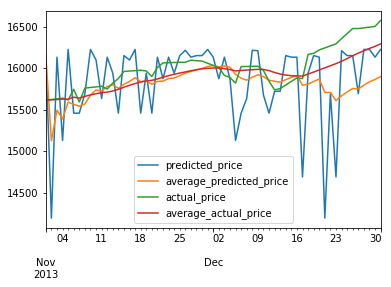

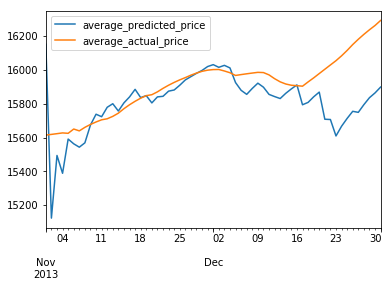

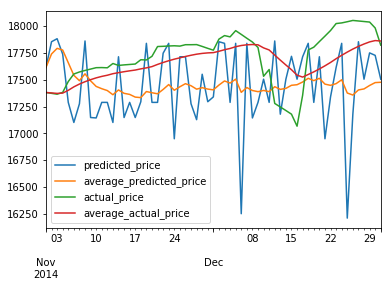

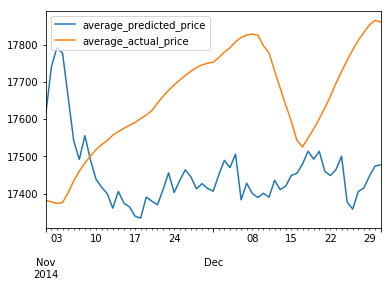

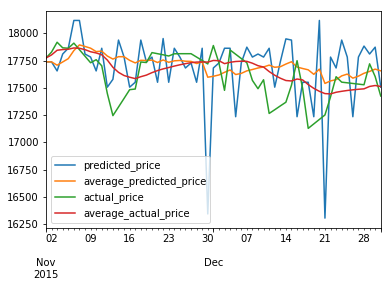

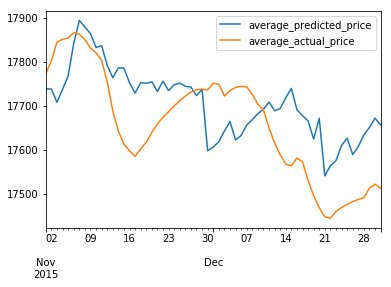

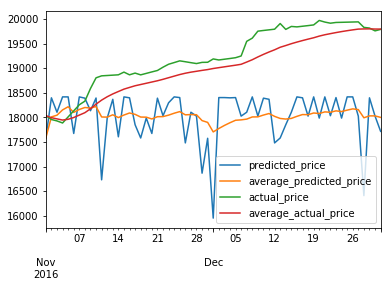

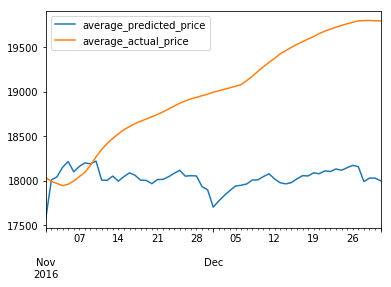

In [52]:
from sklearn.neural_network import MLPClassifier
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.ix[train_start_date : train_end_date]
    test = df.ix[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False) # span = 20 # best 1
    mlpc.fit(numpy_df_train, train['prices'])   
    prediction = mlpc.predict(numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = pd.ewma(predictions_df_list["prices"], span=20, freq="D")
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = pd.ewma(predictions_df_list["actual_value"], span=20, freq="D")
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
#     predictions_df_list.show()



import pickle
filename = 'finalized_model.sav'
pickle.dump(mlpc, open(filename, 'wb'))


   

In [53]:
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='tanh', 
                         solver='lbfgs', alpha=0.010, learning_rate_init = 0.001, shuffle=False)
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.010, learning_rate_init = 0.001, shuffle=False) # span = 20
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False) # span = 20 # best 1
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 50), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False)

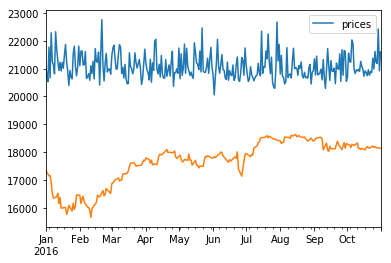

In [54]:
# checking the performance of training data itself
prediction, bias, contributions = ti.predict(rf, numpy_df_train)
idx = pd.date_range(train_start_date, train_end_date)
predictions_df1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
predictions_df1.plot() 
train['prices'].plot()

In [55]:
#import pickle
#filename = 'finalized_model.sav'
#pickle.dump(mlpc, open(filename, 'wb'))


In [56]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test,)
print(result)

TypeError: score() missing 1 required positional argument: 'y'